### Import required packages and limit GPU usage

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import json


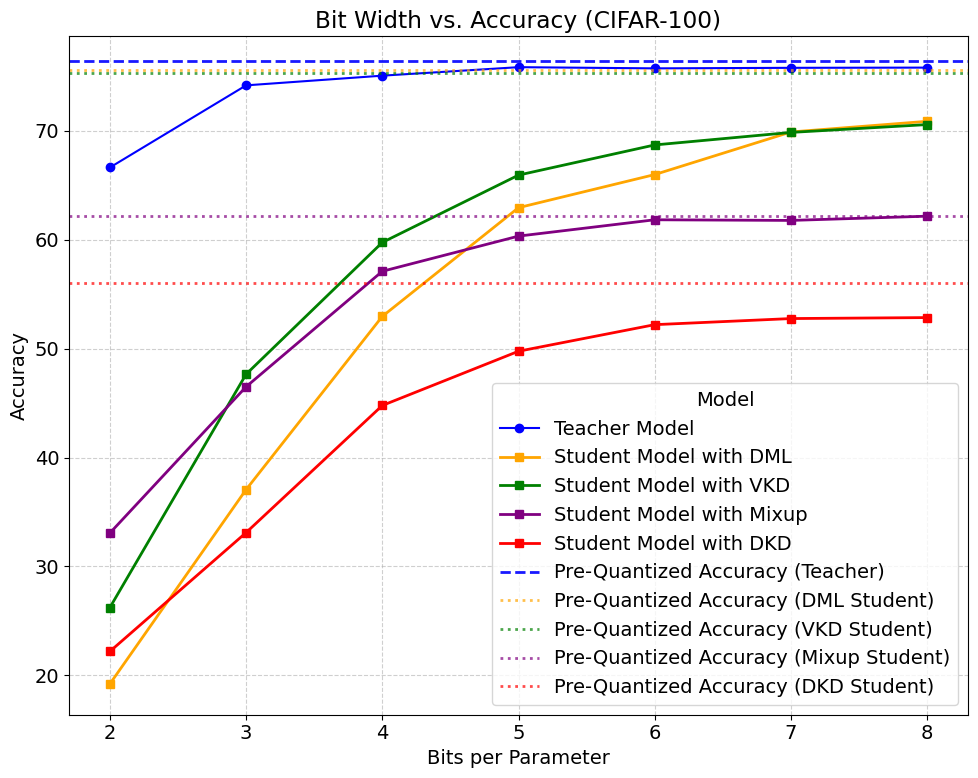

In [11]:
import json
import matplotlib.pyplot as plt

# Load JSON data from files
with open('../logs/quant_student_dml.json', 'r') as file_dml:
    quant_student_dml = json.load(file_dml)

with open('../logs/quant_student_van.json', 'r') as file_van:
    quant_student_van = json.load(file_van)

with open('../logs/quant_student_mixup.json', 'r') as file_mixup:
    quant_student_mixup = json.load(file_mixup)

with open('../logs/quant_student_dkd.json', 'r') as file_dkd:
    quant_student_dkd = json.load(file_dkd)

# Process quant_student_van data
quant_student_van["pre_quantization_teacher"] = 100 * quant_student_van['post_quantization_teacher'][0]
quant_student_van["pre_quantization_student"] = 100 * quant_student_van['post_quantization_student'][0]
quant_student_van['bits'] = quant_student_van['bits'][-7:]  # only keep 2-8 bits
quant_student_van['post_quantization_student'] = quant_student_van['post_quantization_student'][-7:]
quant_student_van['post_quantization_teacher'] = quant_student_van['post_quantization_teacher'][-7:]
quant_student_van["post_quantization_teacher"] = [x * 100 for x in quant_student_van['post_quantization_teacher']]
quant_student_van["post_quantization_student"] = [x * 100 for x in quant_student_van['post_quantization_student']]

# Process quant_student_dml data
quant_student_dml["pre_quantization_teacher"] = 100 * quant_student_dml['post_quantization_teacher'][0]
quant_student_dml["pre_quantization_student"] = 100 * quant_student_dml['post_quantization_student'][0]
quant_student_dml['bits'] = quant_student_dml['bits'][-7:]  # only keep 2-8 bits
quant_student_dml['post_quantization_student'] = quant_student_dml['post_quantization_student'][-7:]
quant_student_dml['post_quantization_teacher'] = quant_student_dml['post_quantization_teacher'][-7:]
quant_student_dml["post_quantization_teacher"] = [x * 100 for x in quant_student_dml['post_quantization_teacher']]
quant_student_dml["post_quantization_student"] = [x * 100 for x in quant_student_dml['post_quantization_student']]

# Process quant_student_mixup data
quant_student_mixup["pre_quantization_teacher"] = 100 * quant_student_mixup['post_quantization_teacher'][0]
quant_student_mixup["pre_quantization_student"] = 100 * quant_student_mixup['post_quantization_student'][0]
quant_student_mixup['bits'] = quant_student_mixup['bits'][-7:]  # only keep 2-8 bits
quant_student_mixup['post_quantization_student'] = quant_student_mixup['post_quantization_student'][-7:]
quant_student_mixup['post_quantization_teacher'] = quant_student_mixup['post_quantization_teacher'][-7:]
quant_student_mixup["post_quantization_teacher"] = [x * 100 for x in quant_student_mixup['post_quantization_teacher']]
quant_student_mixup["post_quantization_student"] = [x * 100 for x in quant_student_mixup['post_quantization_student']]

# Process quant_student_dkd data
quant_student_dkd["pre_quantization_teacher"] = 100 * quant_student_dkd['post_quantization_teacher'][0]
quant_student_dkd["pre_quantization_student"] = 100 * quant_student_dkd['post_quantization_student'][0]
quant_student_dkd['bits'] = quant_student_dkd['bits'][-7:]  # only keep 2-8 bits
quant_student_dkd['post_quantization_student'] = quant_student_dkd['post_quantization_student'][-7:]
quant_student_dkd['post_quantization_teacher'] = quant_student_dkd['post_quantization_teacher'][-7:]
quant_student_dkd["post_quantization_teacher"] = [x * 100 for x in quant_student_dkd['post_quantization_teacher']]
quant_student_dkd["post_quantization_student"] = [x * 100 for x in quant_student_dkd['post_quantization_student']]

# Increase the base font size
plt.rcParams.update({'font.size': 14})

# Plot the data
plt.figure(figsize=(10, 8))
plt.plot(quant_student_van["bits"], quant_student_van["post_quantization_teacher"], marker='o', color='blue', label="Teacher Model")
plt.plot(quant_student_dml["bits"], quant_student_dml["post_quantization_student"], marker='s', linewidth=2, color='orange', label="Student Model with DML")
plt.plot(quant_student_van["bits"], quant_student_van["post_quantization_student"], marker='s', linewidth=2, color='green', label="Student Model with VKD")
plt.plot(quant_student_mixup["bits"], quant_student_mixup["post_quantization_student"], marker='s', linewidth=2, color='purple', label="Student Model with Mixup")
plt.plot(quant_student_dkd["bits"], quant_student_dkd["post_quantization_student"], marker='s', linewidth=2, color='red', label="Student Model with DKD")

# Add horizontal lines for original (pre-quantized) accuracy with matching colors
plt.axhline(y=quant_student_van["pre_quantization_teacher"], color='blue', linestyle='--', alpha=0.9, linewidth=2, label='Pre-Quantized Accuracy (Teacher)')
plt.axhline(y=quant_student_dml["pre_quantization_student"] + 0.5, color='orange', linestyle=':', alpha=0.7, linewidth=2, label='Pre-Quantized Accuracy (DML Student)')
plt.axhline(y=quant_student_van["pre_quantization_student"], color='green', linestyle=':', alpha=0.7, linewidth=2, label='Pre-Quantized Accuracy (VKD Student)')
plt.axhline(y=quant_student_mixup["pre_quantization_student"], color='purple', linestyle=':', alpha=0.7, linewidth=2, label='Pre-Quantized Accuracy (Mixup Student)')
plt.axhline(y=quant_student_dkd["pre_quantization_student"], color='red', linestyle=':', alpha=0.7, linewidth=2, label='Pre-Quantized Accuracy (DKD Student)')

# Add labels and title
plt.title("Bit Width vs. Accuracy (CIFAR-100)")
plt.xlabel("Bits per Parameter")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.6)

# Place the legend
plt.legend(title="Model", loc="best")

# Save the plot as PNG
plt.tight_layout()
plt.savefig('../images/quantacc.png', dpi=500)

# Show the plot
plt.show()


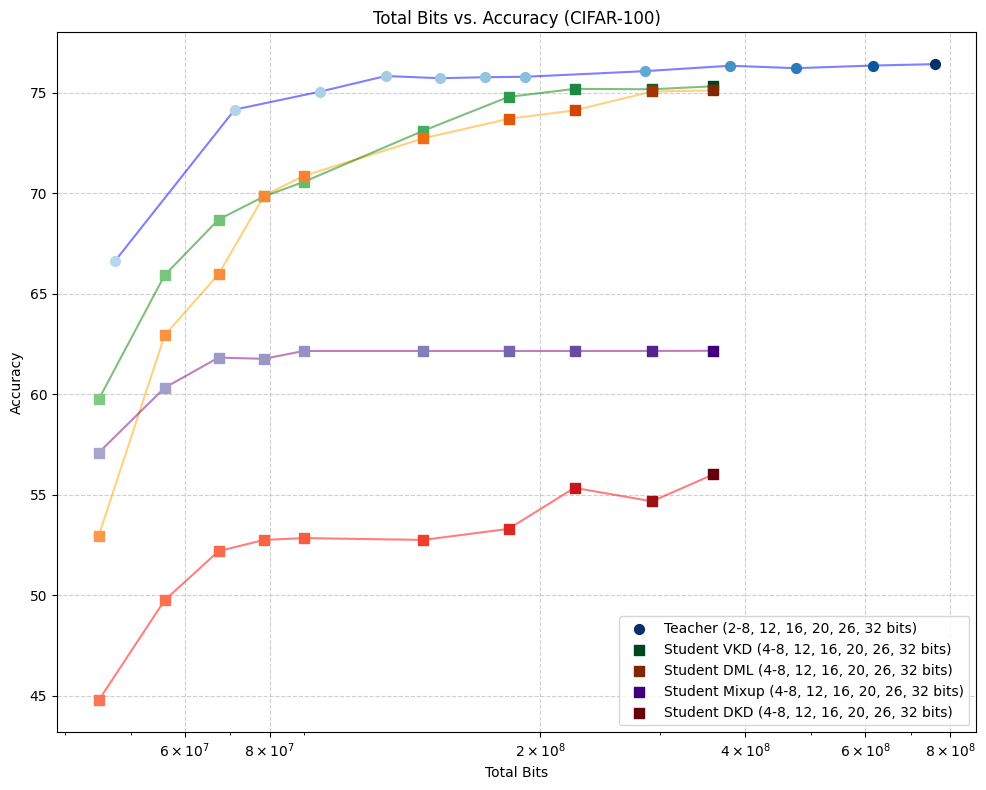

In [1]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the files
with open('../logs/quant_student_dml.json', 'r') as file_dml:
    quant_student_dml = json.load(file_dml)

with open('../logs/quant_student_van.json', 'r') as file_van:
    quant_student_van = json.load(file_van)

with open('../logs/quant_student_mixup.json', 'r') as file_mixup:
    quant_student_mixup = json.load(file_mixup)

with open('../logs/quant_student_dkd.json', 'r') as file_dkd:
    quant_student_dkd = json.load(file_dkd)

# Save original bits list (for teacher total bits) from VAN data
original_bits_list = quant_student_van['bits']

# Remove 2,3 bits from each dataset (truncate the last two entries)
quant_student_van['bits'] = quant_student_van['bits'][:-2]
quant_student_van['post_quantization_student'] = quant_student_van['post_quantization_student'][:-2]

quant_student_dml['bits'] = quant_student_dml['bits'][:-2]
quant_student_dml['post_quantization_student'] = quant_student_dml['post_quantization_student'][:-2]

quant_student_mixup['bits'] = quant_student_mixup['bits'][:-2]
quant_student_mixup['post_quantization_student'] = quant_student_mixup['post_quantization_student'][:-2]

quant_student_dkd['bits'] = quant_student_dkd['bits'][:-2]
quant_student_dkd['post_quantization_student'] = quant_student_dkd['post_quantization_student'][:-2]

# Scale accuracies by 100 for VAN and DML
quant_student_van["pre_quantization_teacher"] = 100 * quant_student_van['pre_quantization_teacher']
quant_student_dml["pre_quantization_teacher"] = 100 * quant_student_dml['pre_quantization_teacher']

quant_student_van["post_quantization_teacher"] = [x * 100 for x in quant_student_van['post_quantization_teacher']]
quant_student_dml["post_quantization_teacher"] = [x * 100 for x in quant_student_dml['post_quantization_teacher']]

quant_student_van["pre_quantization_student"] = 100 * quant_student_van['pre_quantization_student']
quant_student_dml["pre_quantization_student"] = 100 * quant_student_dml['pre_quantization_student']

quant_student_van["post_quantization_student"] = [x * 100 for x in quant_student_van['post_quantization_student']]
quant_student_dml["post_quantization_student"] = [x * 100 for x in quant_student_dml['post_quantization_student']]

# Scale accuracies for Mixup data in the same way
quant_student_mixup["pre_quantization_teacher"] = 100 * quant_student_mixup['pre_quantization_teacher']
quant_student_mixup["post_quantization_teacher"] = [x * 100 for x in quant_student_mixup['post_quantization_teacher']]
quant_student_mixup["pre_quantization_student"] = 100 * quant_student_mixup['pre_quantization_student']
quant_student_mixup["post_quantization_student"] = [x * 100 for x in quant_student_mixup['post_quantization_student']]

# Scale accuracies for DKD data similarly
quant_student_dkd["pre_quantization_teacher"] = 100 * quant_student_dkd['pre_quantization_teacher']
quant_student_dkd["post_quantization_teacher"] = [x * 100 for x in quant_student_dkd['post_quantization_teacher']]
quant_student_dkd["pre_quantization_student"] = 100 * quant_student_dkd['pre_quantization_student']
quant_student_dkd["post_quantization_student"] = [x * 100 for x in quant_student_dkd['post_quantization_student']]

# Assume count_parameters function and models (teacher_net, van_student_net) are defined elsewhere
num_parameter_teacher = 23705252
quant_student_van["teacher_total_bits"] = [x * num_parameter_teacher for x in original_bits_list]

num_parameter_student = 11220132
quant_student_dml["total_bits"] = [x * num_parameter_student for x in quant_student_dml['bits']]
quant_student_van["total_bits"] = [x * num_parameter_student for x in quant_student_van['bits']]
quant_student_mixup["total_bits"] = [x * num_parameter_student for x in quant_student_mixup['bits']]
quant_student_dkd["total_bits"] = [x * num_parameter_student for x in quant_student_dkd['bits']]

# Define fixed colors for pre-quantization models
pre_student_color_dml = "orange"
pre_student_color_van = "green"
pre_teacher_color = "blue"

# Define marker styles (added new markers for Mixup and DKD students)
marker_mapping = {
    "pre_student": "o",          # Circle for pre-quantization Student
    "post_student": "s",         # Square for post-quantization Student (DML, VAN)
    "pre_teacher": "^",          # Triangle for pre-quantization Teacher
    "post_teacher": "o",         # Circle for post-quantization Teacher
    "post_student_mixup": "s",   # Square for Mixup Student
    "post_student_dkd": "s"      # Diamond for DKD Student
}

# (Pre-quantization scatter points are commented out below)
pre_quantization_student_van_accuracy = quant_student_dml['pre_quantization_student']
pre_quantization_student_dml_accuracy = quant_student_van['pre_quantization_student']
pre_quantization_teacher_accuracy = quant_student_dml['pre_quantization_teacher']

pre_quantization_student_dml_bit_para = 357566784
pre_quantization_teacher_bit_para = 752666944

# Create colormaps for bit precisions for each model
cmap_student_dml = plt.cm.Oranges
cmap_student_van = plt.cm.Greens
cmap_teacher = plt.cm.Blues
cmap_student_mixup = plt.cm.Purples   # colormap for Mixup Student
cmap_student_dkd = plt.cm.Reds        # colormap for DKD Student

norm_student_dml = plt.Normalize(vmin=-5 * min(quant_student_dml['total_bits']), vmax=max(quant_student_dml['total_bits']))
norm_student_van = plt.Normalize(vmin=-5 * min(quant_student_van['total_bits']), vmax=max(quant_student_van['total_bits']))
norm_teacher = plt.Normalize(vmin=-5 * min(quant_student_van['teacher_total_bits']), vmax=max(quant_student_van['teacher_total_bits']))
norm_student_mixup = plt.Normalize(vmin=-5 * min(quant_student_mixup['total_bits']), vmax=max(quant_student_mixup['total_bits']))
norm_student_dkd = plt.Normalize(vmin=-5 * min(quant_student_dkd['total_bits']), vmax=max(quant_student_dkd['total_bits']))

fig, ax = plt.subplots(figsize=(10, 8))

# Plot line plots for Post-Quantization accuracy
ax.plot(quant_student_dml['total_bits'], quant_student_dml['post_quantization_student'], 
        color='orange', alpha=0.5, linestyle='-', linewidth=1.5)
ax.plot(quant_student_van['total_bits'], quant_student_van['post_quantization_student'], 
        color='green', alpha=0.5, linestyle='-', linewidth=1.5)
ax.plot(quant_student_mixup['total_bits'], quant_student_mixup['post_quantization_student'], 
        color='purple', alpha=0.5, linestyle='-', linewidth=1.5)  # line for Mixup
ax.plot(quant_student_dkd['total_bits'], quant_student_dkd['post_quantization_student'], 
        color='red', alpha=0.5, linestyle='-', linewidth=1.5)  # line for DKD

# Plot line for Post-Quantization Teacher
ax.plot(quant_student_van['teacher_total_bits'], quant_student_van['post_quantization_teacher'], 
        color='blue', alpha=0.5, linestyle='-', linewidth=1.5)

# Plot scatter for Teacher (Post-Quantization)
teacher_bits = quant_student_van['teacher_total_bits']
teacher_post_accuracy = quant_student_van['post_quantization_teacher']
for i, bits in enumerate(teacher_bits):
    color_teacher = cmap_teacher(norm_teacher(bits))
    ax.scatter(bits, teacher_post_accuracy[i], color=color_teacher, marker=marker_mapping["post_teacher"], s=50, zorder=10,
               label="Teacher (2-8, 12, 16, 20, 26, 32 bits)" if i == 0 else "")
# Uncomment below if pre-quantization teacher scatter is needed
# ax.scatter(pre_quantization_teacher_bit_para, pre_quantization_teacher_accuracy, 
#            color=pre_teacher_color, marker=marker_mapping["pre_teacher"], label="Teacher (Pre-Quantization)", s=40, zorder=10)

# Plot scatter for Student VAN (Post-Quantization)
student_van_bits = quant_student_van['total_bits']
student_van_post_accuracy = quant_student_van['post_quantization_student']
for i, bits in enumerate(student_van_bits):
    color_student = cmap_student_van(norm_student_van(bits))
    ax.scatter(bits, student_van_post_accuracy[i], color=color_student, marker=marker_mapping["post_student"], s=50, zorder=10,
               label="Student VKD (4-8, 12, 16, 20, 26, 32 bits)" if i == 0 else "")
# Uncomment below if pre-quantization VAN scatter is needed
# ax.scatter(pre_quantization_student_dml_bit_para, pre_quantization_student_van_accuracy, 
#            color=pre_student_color_van, marker=marker_mapping["pre_student"], label="Student VKD (Pre-Quantization)", s=40, zorder=10)

# Plot scatter for Student DML (Post-Quantization)
student_dml_bits = quant_student_dml['total_bits']
student_dml_post_accuracy = quant_student_dml['post_quantization_student']
for i, bits in enumerate(student_dml_bits):
    color_student = cmap_student_dml(norm_student_dml(bits))
    ax.scatter(bits, student_dml_post_accuracy[i], color=color_student, marker=marker_mapping["post_student"], s=50, zorder=10,
               label="Student DML (4-8, 12, 16, 20, 26, 32 bits)" if i == 0 else "")
# Uncomment below if pre-quantization DML scatter is needed
# ax.scatter(pre_quantization_student_dml_bit_para, pre_quantization_student_dml_accuracy, 
#            color=pre_student_color_dml, marker=marker_mapping["pre_student"], label="Student DML (Pre-Quantization)", s=40, zorder=10)

# Plot scatter for Student Mixup (Post-Quantization)
student_mixup_bits = quant_student_mixup['total_bits']
student_mixup_post_accuracy = quant_student_mixup['post_quantization_student']
for i, bits in enumerate(student_mixup_bits):
    color_student = cmap_student_mixup(norm_student_mixup(bits))
    ax.scatter(bits, student_mixup_post_accuracy[i], color=color_student, marker=marker_mapping["post_student_mixup"], s=50, zorder=10,
               label="Student Mixup (4-8, 12, 16, 20, 26, 32 bits)" if i == 0 else "")

# Plot scatter for Student DKD (Post-Quantization)
student_dkd_bits = quant_student_dkd['total_bits']
student_dkd_post_accuracy = quant_student_dkd['post_quantization_student']
for i, bits in enumerate(student_dkd_bits):
    color_student = cmap_student_dkd(norm_student_dkd(bits))
    ax.scatter(bits, student_dkd_post_accuracy[i], color=color_student, marker=marker_mapping["post_student_dkd"], s=50, zorder=10,
               label="Student DKD (4-8, 12, 16, 20, 26, 32 bits)" if i == 0 else "")

# Labels and title
plt.xlabel("Total Bits")
plt.ylabel("Accuracy")
plt.title("Total Bits vs. Accuracy (CIFAR-100)")
plt.xscale("log")  # Using log scale for better parameter visualization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Customizing x-axis ticks
tick_values = []
tick_labels = []
for i in range(7, 9):  # Ranges from 10^7 to less than 10^9
    for k in range(2, 10, 2):
        value = k * 10**i
        if value > 5*10**7:
            tick_values.append(value)
            if k == 1:
                tick_labels.append(f'$10^{i}$')
            else:
                tick_labels.append(f'${k} \\times 10^{i}$')

plt.xticks(tick_values, tick_labels, rotation=0, fontsize=10)

# Save the plot
plt.tight_layout()
plt.savefig('../images/bitsparams.png', dpi=500)
plt.show()
